In [8]:
from IPython.display import Markdown, display
import numpy as np
import pandas as pd
import pyflux as pf
from datetime import datetime
from modules import dataframe_manip as hp
import pytz
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
def printmd(string):
    display(Markdown(string))

In [3]:
building_list = [
    ' POMONA','118-8TH','1567TH','345C','ALEXANDER','ANDREW','BALDWIN',
    'BRACKETT','BRIDGES','CARNEGIE','CLARK3','CLARKI','CLARKV',
    'CROOKSHANK','DRAPER', 'FARM', 'FRANK', 'FRARY', 'GIBONEY',
    'GIBSON', 'GROUNDS', 'HAHN', 'HALDEMAN','HARWOOD','ITB',
    'KENYON', 'LAWRY', 'LEB', 'LEBUS', 'MASON', 'MCCARTHY', 'MERRIT',
    'MILLIKAN', 'MUSEUM', 'NORTON', 'OLDENBORG','PAULEY','PEARSON',
    'PENDLETON','POMONA','RAINS','REMBRANDT', 'SCC', 'SEAVER','SGM',
    'SMILEY','SMITH','SONTAG','STUDIOART','SUMNER','THATCHER','WALKER',
    'WALTON','WIG']

In [4]:
data = hp.csv_to_timeseries_df(filepath='wifi_data_until_20190204.csv', timezone=pytz.timezone('US/Pacific'))

** POMONA**

VAR(6)                                                                                                    
======================================================= ==================================================
Dependent Variable: Differenced Differenced Differenced Method: OLS                                       
Start Date: 2018-07-24 00:00:00                         Log Likelihood: -4.273446386865588e+31            
End Date: 2019-02-04 00:00:00                           AIC: 8.54782122876064e+31                         
Number of observations: 192                             BIC: 8.546970144983631e+31                        
Latent Variable                          Estimate   Std Error  z        P>|z|    95% C.I.                 
======================================== ========== ========== ======== ======== =========================
Differenced Differenced Differenced Diff 0.0073     0.0279     0.2599   0.795    (-0.0474 | 0.062)        
Differenced Differenced Differenced D

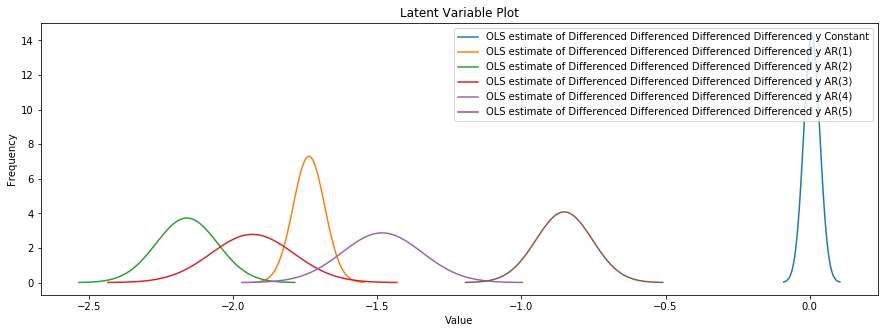

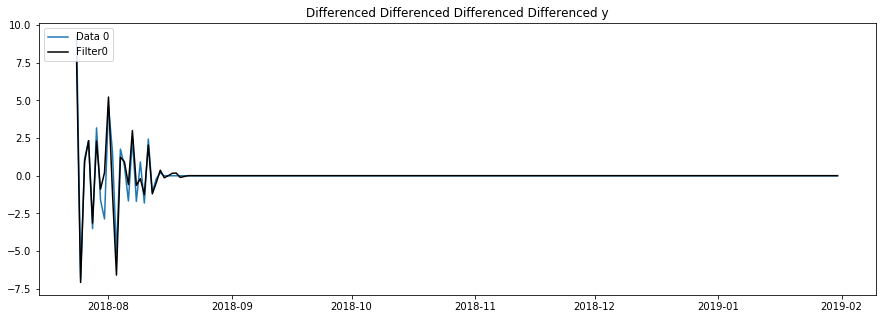

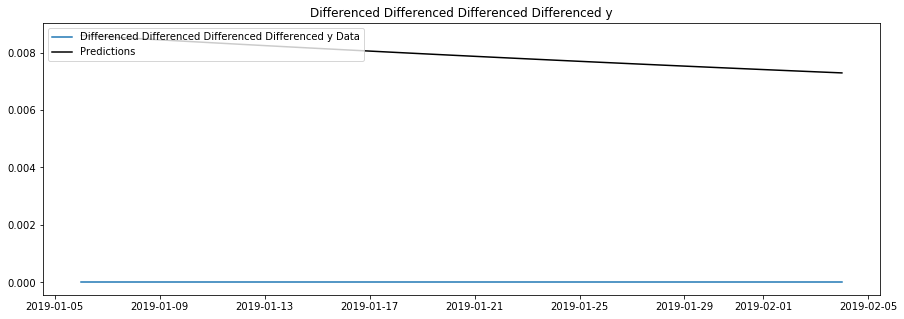

**118-8TH**

VAR(6)                                                                                                    
======================================================= ==================================================
Dependent Variable: Differenced Differenced Differenced Method: OLS                                       
Start Date: 2018-07-24 00:00:00                         Log Likelihood: -1.7241530789729095e+30           
End Date: 2019-02-04 00:00:00                           AIC: 7.724181034997849e+31                        
Number of observations: 192                             BIC: 7.724606576886353e+31                        
Latent Variable                          Estimate   Std Error  z        P>|z|    95% C.I.                 
======================================== ========== ========== ======== ======== =========================
Differenced Differenced Differenced Diff 0.0243     0.2217     0.1098   0.9126   (-0.4102 | 0.4588)       
Differenced Differenced Differenced D

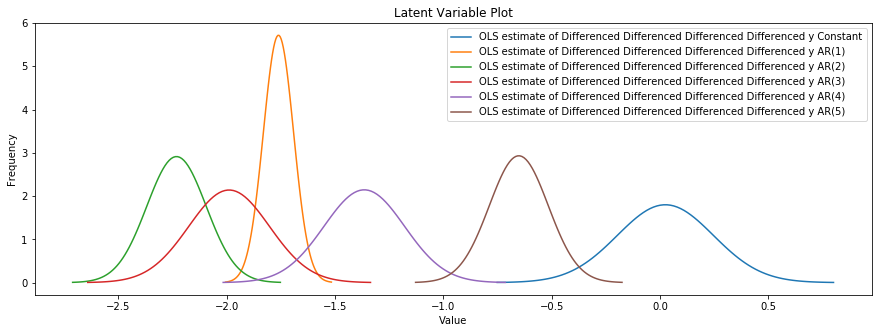

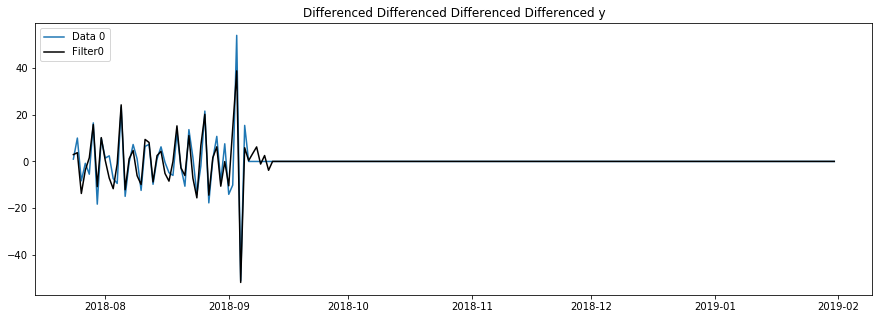

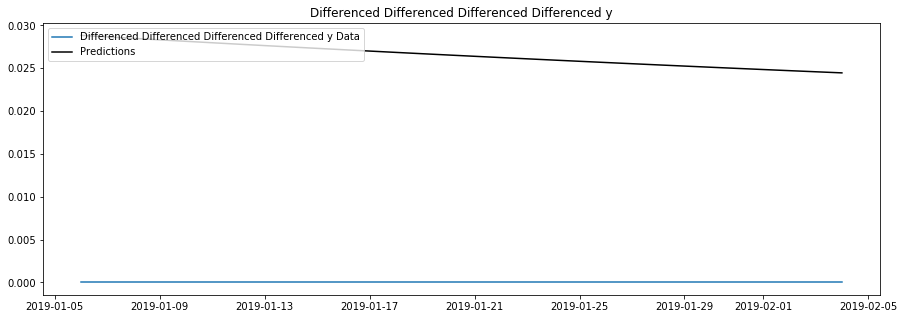

**1567TH**

VAR(6)                                                                                                    
======================================================= ==================================================
Dependent Variable: Differenced Differenced Differenced Method: OLS                                       
Start Date: 2018-07-24 00:00:00                         Log Likelihood: -1.584499419002011e+31            
End Date: 2019-02-04 00:00:00                           AIC: 3.168921466751567e+31                        
Number of observations: 192                             BIC: 3.1554859487626977e+31                       
Latent Variable                          Estimate   Std Error  z        P>|z|    95% C.I.                 
======================================== ========== ========== ======== ======== =========================
Differenced Differenced Differenced Diff -0.0054    0.0685     -0.0782  0.9377   (-0.1396 | 0.1289)       
Differenced Differenced Differenced D

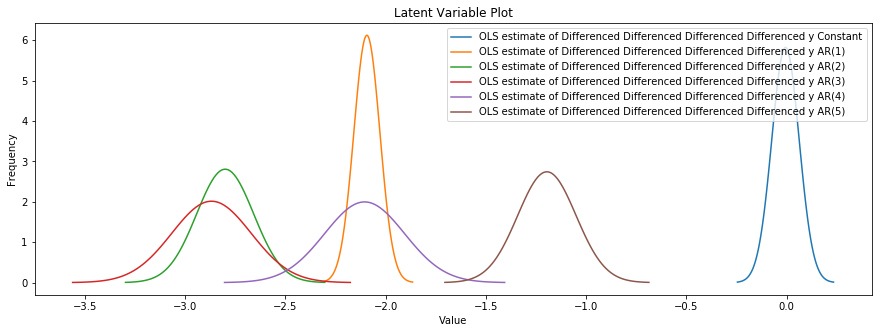

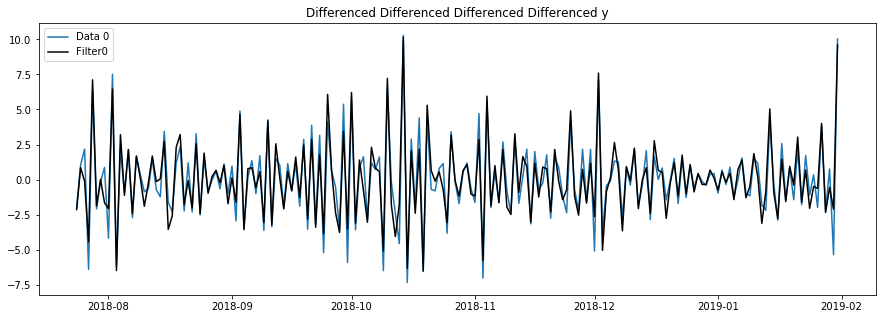

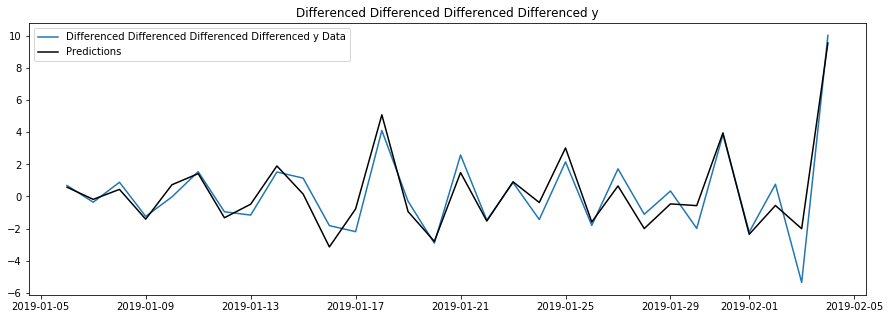

**345C**

VAR(6)                                                                                                    
======================================================= ==================================================
Dependent Variable: Differenced Differenced Differenced Method: OLS                                       
Start Date: 2018-07-24 00:00:00                         Log Likelihood: -3.9038380246512435e+18           
End Date: 2019-02-04 00:00:00                           AIC: 7.808775560930263e+18                        
Number of observations: 192                             BIC: 7.808511678139597e+18                        
Latent Variable                          Estimate   Std Error  z        P>|z|    95% C.I.                 
======================================== ========== ========== ======== ======== =========================
Differenced Differenced Differenced Diff 0.0192     0.0716     0.2686   0.7882   (-0.1211 | 0.1596)       
Differenced Differenced Differenced D

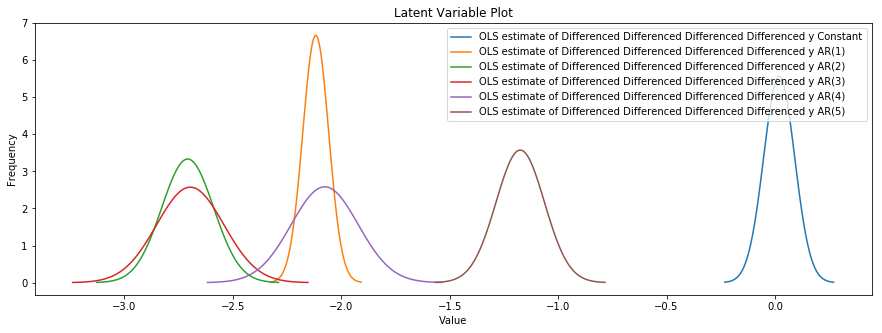

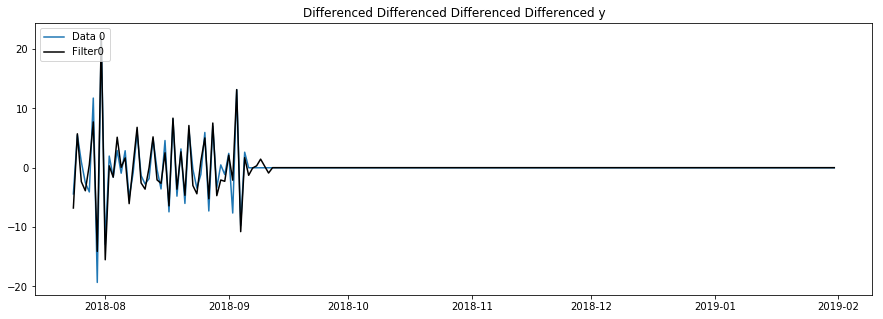

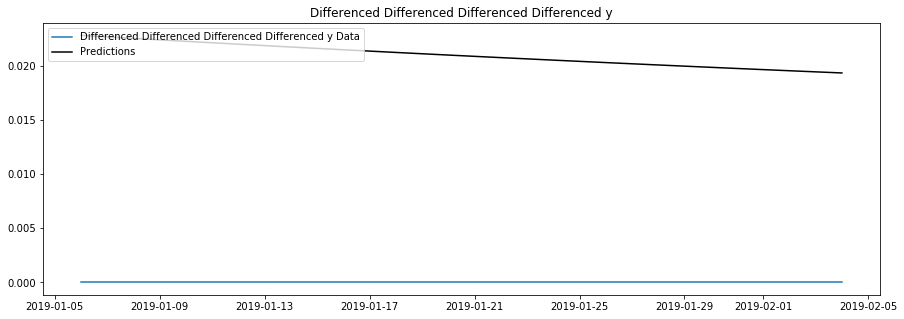

**ALEXANDER**

VAR(6)                                                                                                    
======================================================= ==================================================
Dependent Variable: Differenced Differenced Differenced Method: OLS                                       
Start Date: 2018-07-24 00:00:00                         Log Likelihood: -3.433497736614249e+18            
End Date: 2019-02-04 00:00:00                           AIC: 6.867215375554053e+18                        
Number of observations: 192                             BIC: 6.866335766251832e+18                        
Latent Variable                          Estimate   Std Error  z        P>|z|    95% C.I.                 
======================================== ========== ========== ======== ======== =========================
Differenced Differenced Differenced Diff 0.16       1.2987     0.1232   0.9019   (-2.3854 | 2.7055)       
Differenced Differenced Differenced D

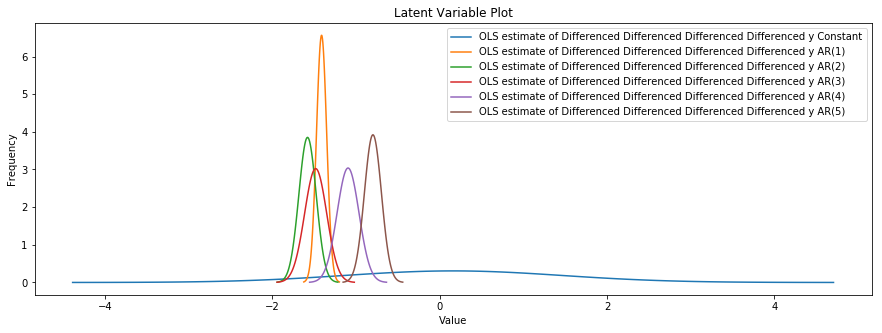

KeyboardInterrupt: 

In [11]:
for building in building_list:
    temp = hp.get_hourly_data_building(data, building)
    temp = temp.resample('D').mean() #daily mean
    temp['y'] = temp.sum(axis=1)
    temp = temp['y']
    temp = pd.DataFrame(temp).reset_index()
    temp.columns = ['ds', 'y']
#     temp['ds'] = temp['ds'].astype(str).str[:-9]
    temp['ds'] = temp['ds'].astype(str).str[:-15] #daily mean
    test = pd.DataFrame()
    test['y'] = temp['y']
    test.index = pd.to_datetime(temp['ds'].values)
    
    # Model data
    model = pf.VAR(data=test, lags=6, integ=4)
    printmd('**{}**'.format(building))
    x = model.fit()
    x.summary()
    model.plot_z(list(range(0,6)),figsize=(15,5))
    model.plot_fit(figsize=(15,5))
#     model.plot_predict(past_values=19, h=5, figsize=(15,5))
    model.plot_predict_is(h=30, figsize=((15,5)))